While t-SNE results may show slight variations due to the stochastic nature of the algorithm, the overall structure and patterns in the data remain consistent. 

The vast unexplored chemical space is a significant and clear feature of the data, representing the many potential compounds that are yet to be discovered. 

['MAMPUM02.search1.cif']
Target names: ['MAMPUM02.search1.cif']
Indices of target names in CSV: [4476]


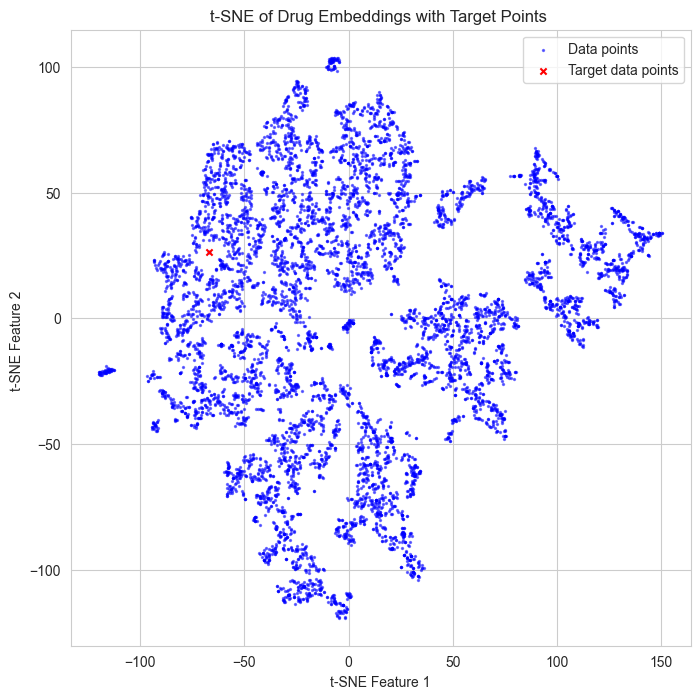

In [27]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Read CSV file
df = pd.read_csv('./embedding_MolCLR.csv')

# Assume df is the loaded DataFrame containing the 'embedding' column
labels = df.iloc[:, 0].values

# List of target names
target_names = ['MAMPUM02.search1.cif']
print(target_names)

# Find the indices of specific data points in the CSV file
csv_target_indices = [np.where(labels == name)[0][0] for name in target_names if name in labels]  # Ensure the target names are in labels

# Print the target names and indices for debugging
print("Target names:", target_names)
print("Indices of target names in CSV:", csv_target_indices)

# Extract embeddings
embeddings = np.array([df['embedding'].iloc[i].split(',') for i in range(len(df))])
embeddings = embeddings.astype(np.float64)

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, init='pca', random_state=42, n_iter=3000)
tsne_results = tsne.fit_transform(embeddings)

# Add t-SNE results to the DataFrame
df['t-SNE Feature 1'] = tsne_results[:, 0]
df['t-SNE Feature 2'] = -tsne_results[:, 1]  

# Save t-SNE results to a CSV file
tsne_df = df[['label', 't-SNE Feature 1', 't-SNE Feature 2']]
tsne_df.to_csv('tsne_embeddings_2.csv', index=False)

# Plot scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(-tsne_results[:, 0], tsne_results[:, 1], c='blue', marker='o', alpha=0.5, label='Data points', s=2)

# Mark specific data points
if csv_target_indices:
    plt.scatter(-tsne_results[csv_target_indices, 0], tsne_results[csv_target_indices, 1], c='red', marker='x', label='Target data points', s=20)

plt.legend()
plt.title('t-SNE of Drug Embeddings with Target Points ')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2 ')
plt.show()